In [3]:
#Import and load data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C:\\Users\\shani\\VS Code\\MLOPs\\EmployeeAttrition\\data\\EmployeeAttrition_Kaggle.csv")

# Look at shape and first few rows
print(df.shape)
df.head()


(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Data types and non-null counts
df.info()

# Summary statistics for numeric columns
df.describe()

# Count missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Attrition
No     1233
Yes     237
Name: count, dtype: int64


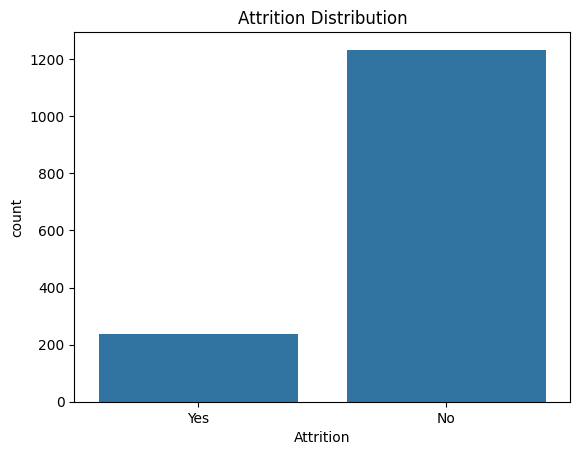

In [5]:
print(df["Attrition"].value_counts())
sns.countplot(x="Attrition", data=df)
plt.title("Attrition Distribution")
plt.show()


Attrition unique values: ['Yes' 'No']


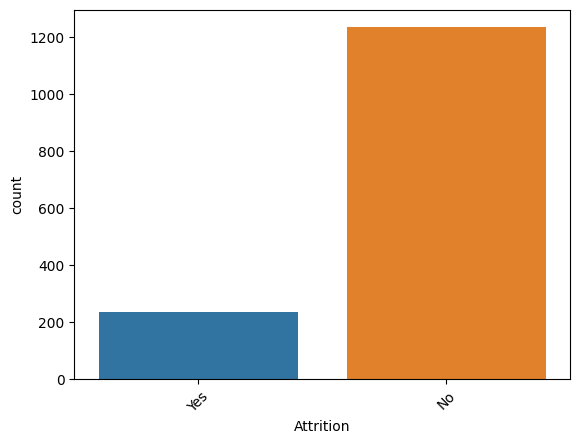


BusinessTravel unique values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


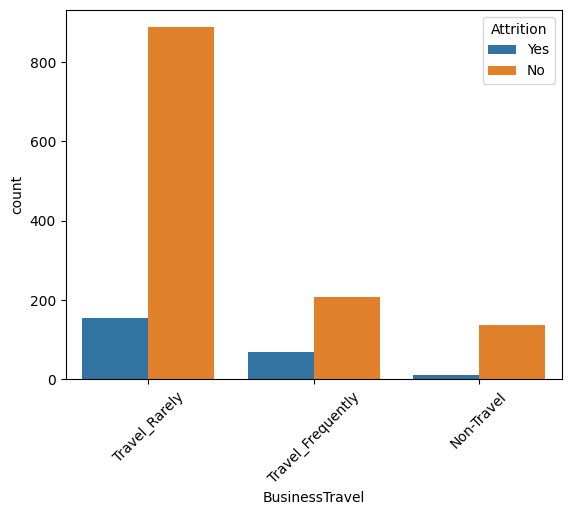


Department unique values: ['Sales' 'Research & Development' 'Human Resources']


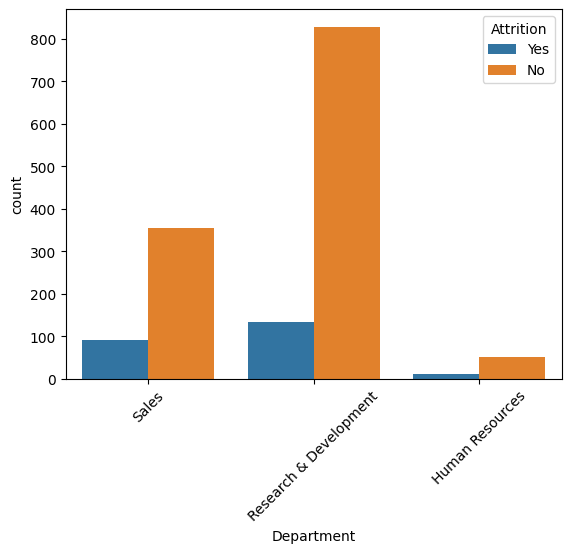


EducationField unique values: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']


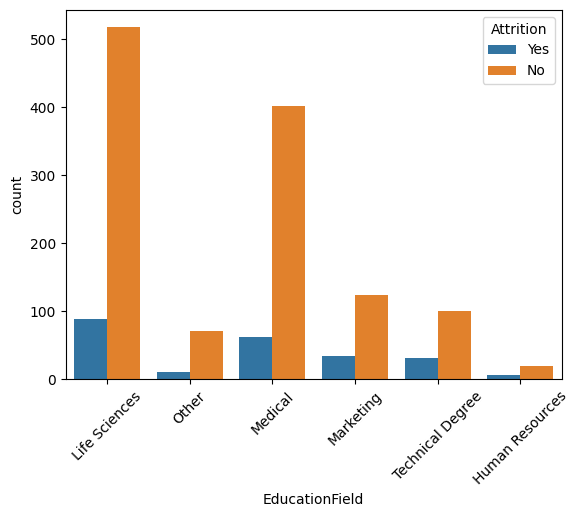


Gender unique values: ['Female' 'Male']


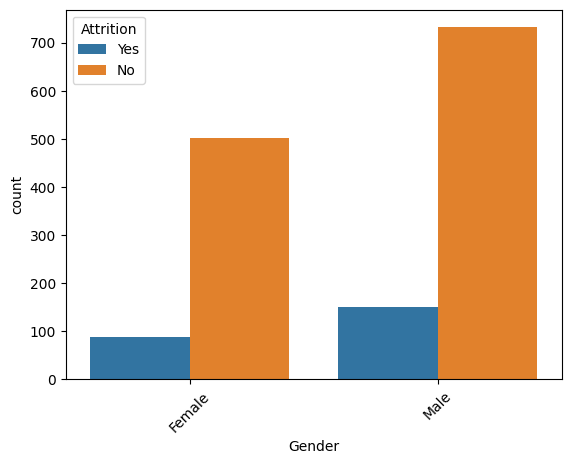


JobRole unique values: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


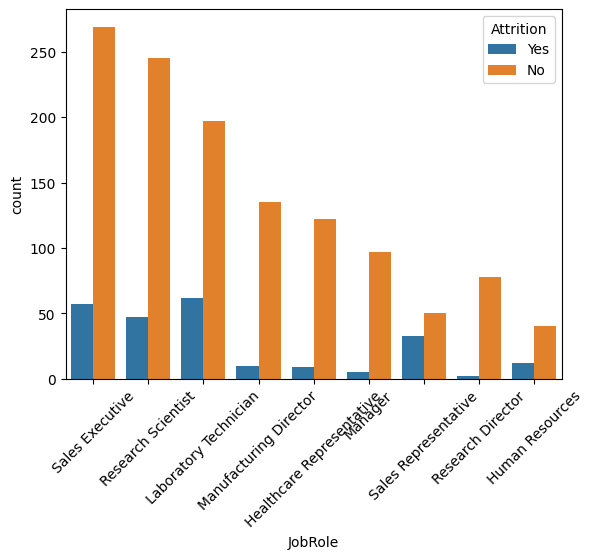


MaritalStatus unique values: ['Single' 'Married' 'Divorced']


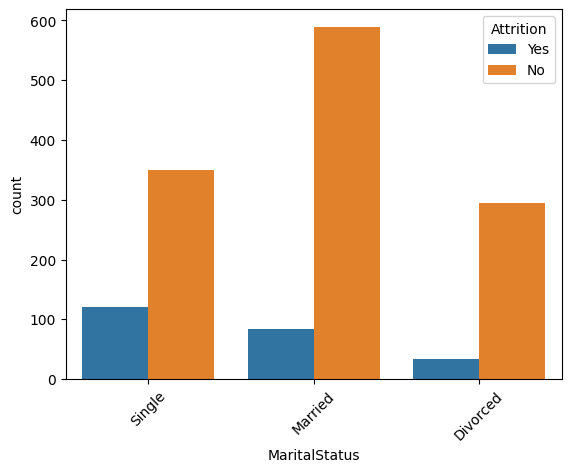


Over18 unique values: ['Y']


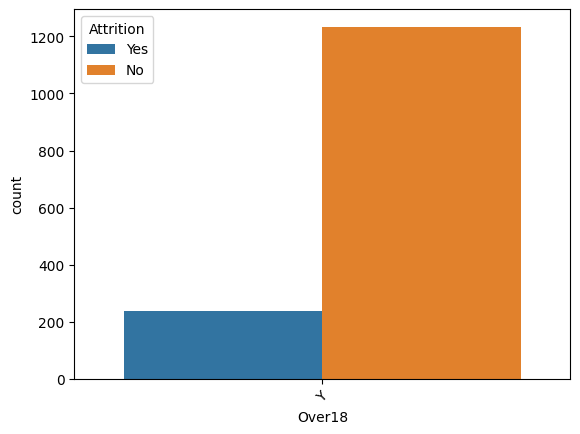


OverTime unique values: ['Yes' 'No']


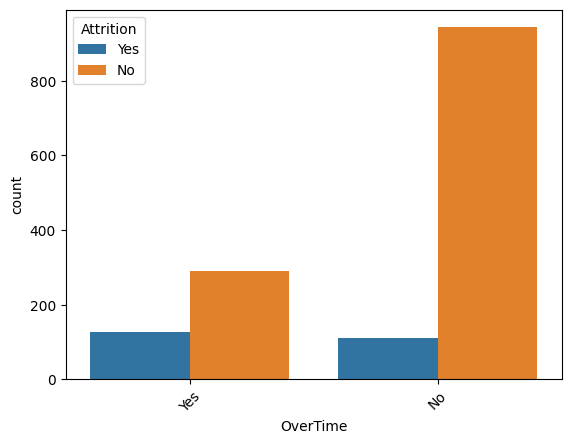

In [6]:
categorical_cols = df.select_dtypes(include="object").columns
for col in categorical_cols:
    print(f"\n{col} unique values: {df[col].unique()}")
    sns.countplot(x=col, data=df, hue="Attrition")
    plt.xticks(rotation=45)
    plt.show()

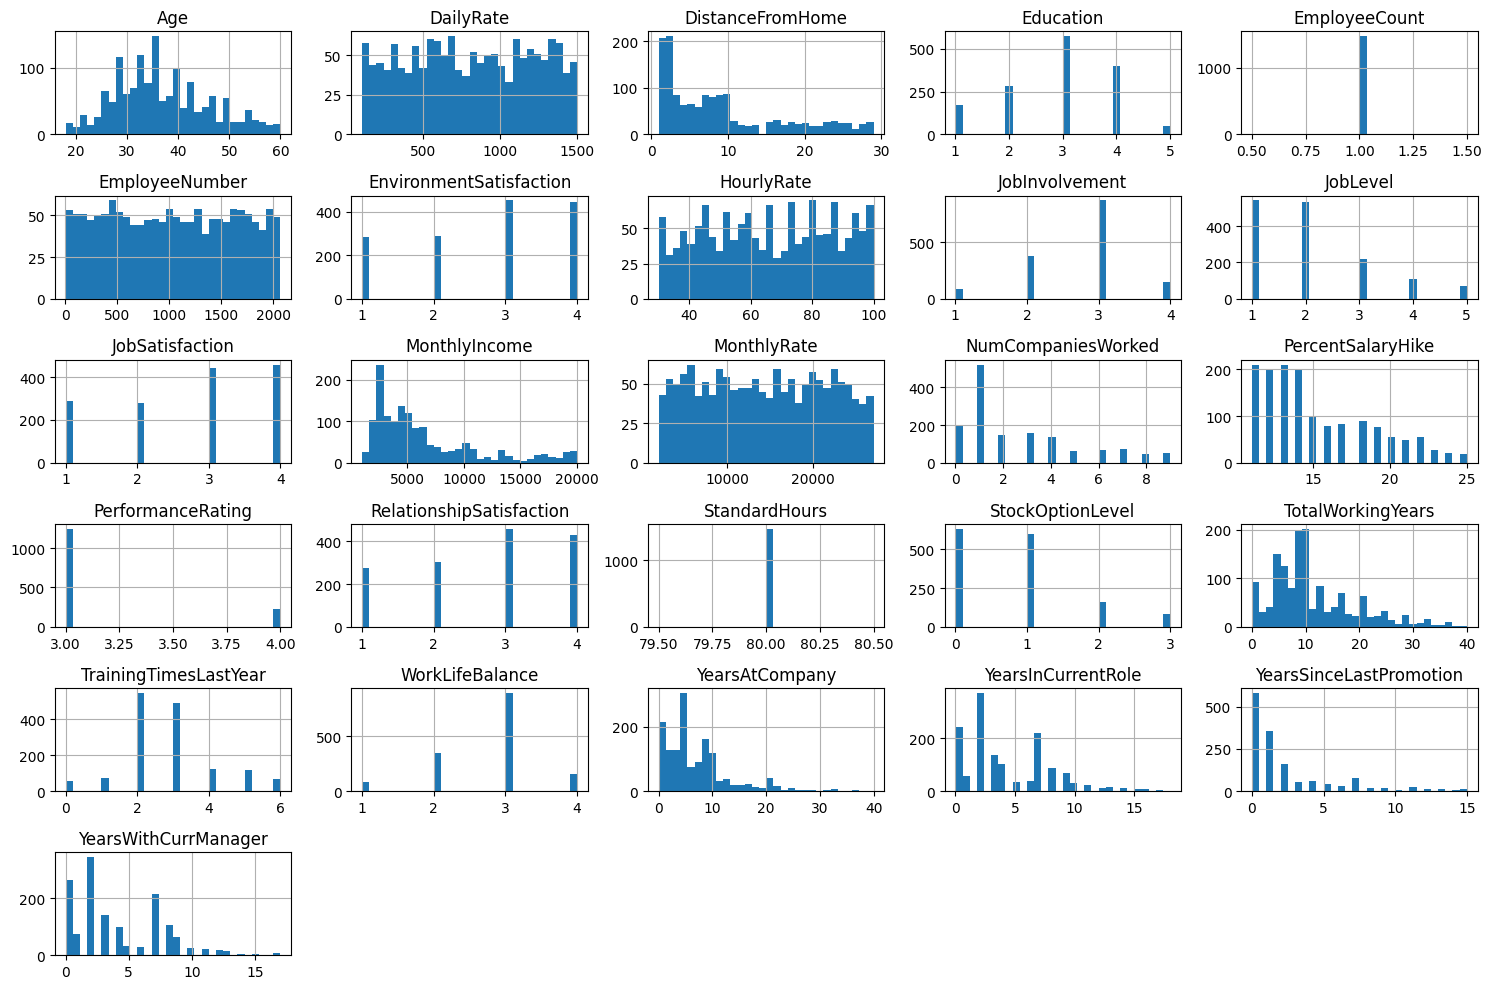

In [7]:
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns

df[numeric_cols].hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

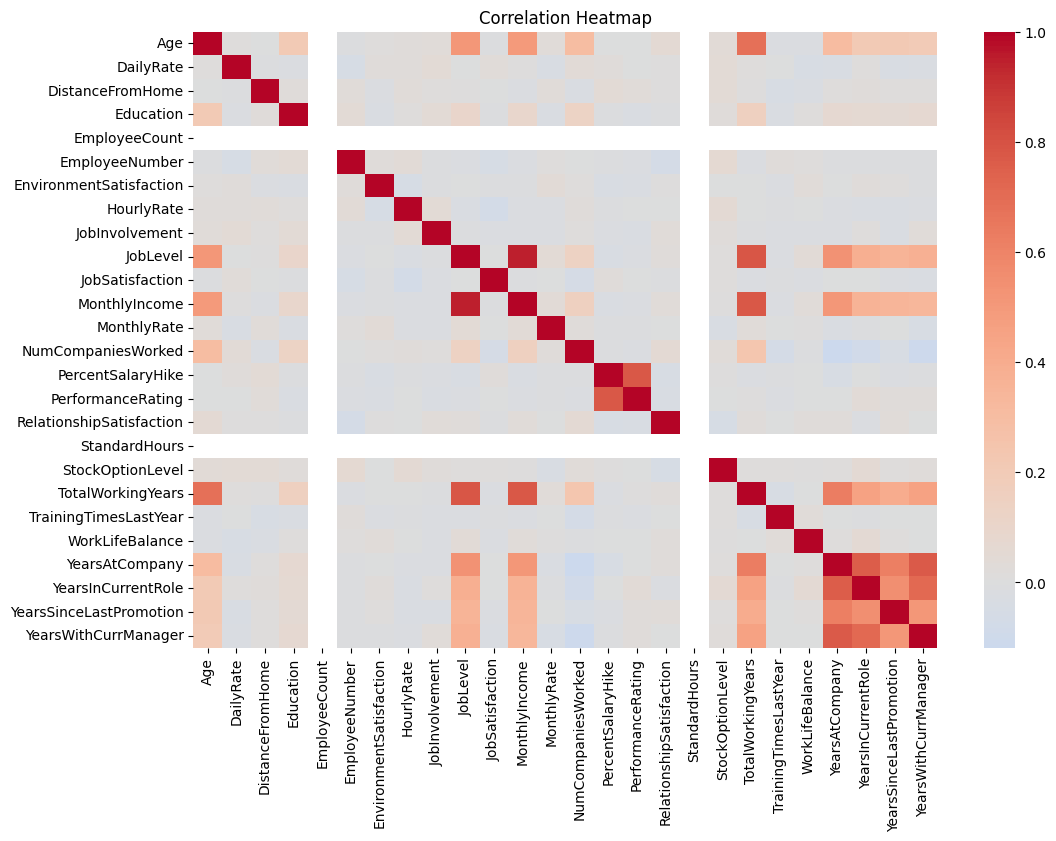

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

In [9]:
# These columns usually don’t add value
to_drop = ["EmployeeNumber", "EmployeeCount", "StandardHours", "Over18"]
df = df.drop(columns=to_drop, errors="ignore")

print("Remaining columns:", df.shape[1])

Remaining columns: 31


In [11]:
df.to_csv("/Users/shani/VS Code/MLOPS/EmployeeAttrition/data/employee_attrition_clean.csv", index=False)
print("Saved cleaned dataset!")

Saved cleaned dataset!
